# TechLab - Portfolio Optimization Pt.1

Nel primo laboratorio prenderemo confidenza con l’ambiente di laboratorio Jupyter, impareremo ad ottenere le quotazioni giornaliere di mercato e calcolremo valori attesi dei rendimenti e varianze annualizzate.

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy.stats as stats
import math
from pypfopt import expected_returns

In [2]:
# Scelgo gli asset su cui effettuare l'analisi

assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Scarico i prezzi di mercato degli asset

stockStartDate = '2020-01-01'
today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,209.779999,1898.010010,74.333511,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.610840,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,74.197395,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.848442,330.750000,1393.339966
2020-01-08,215.220001,1891.969971,75.036385,339.260010,1404.319946
...,...,...,...,...,...
2021-02-22,260.329987,3180.739990,126.000000,533.780029,2064.879883
2021-02-23,265.859985,3194.500000,125.860001,546.150024,2070.860107
2021-02-24,264.309998,3159.530029,125.349998,553.409973,2095.169922


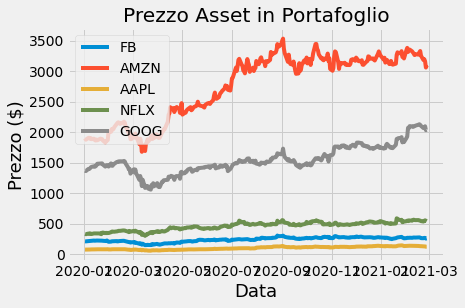

In [4]:
# Visualizzo l'andamento dei prezzi degli asset scelti

title = 'Prezzo Asset in Portafoglio'
my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label =c)

plt.title(title)
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Prezzo ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [5]:
# In luogo dei prezzi, utilizziamo i simple returns

returns = expected_returns.returns_from_prices(df).dropna()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-03,-0.005291,-0.012139,-0.009722,-0.011855,-0.004907
2020-01-06,0.018834,0.014886,0.007968,0.030469,0.024657
2020-01-07,0.002164,0.002092,-0.004703,-0.015127,-0.000624
2020-01-08,0.010138,-0.007809,0.016086,0.025729,0.007880
2020-01-09,0.014311,0.004799,0.021241,-0.010611,0.011044
...,...,...,...,...,...
2021-02-22,-0.004703,-0.021281,-0.029799,-0.011921,-0.017257
2021-02-23,0.021242,0.004326,-0.001111,0.023174,0.002896
2021-02-24,-0.005830,-0.010947,-0.004052,0.013293,0.011739


In [6]:
# Calcolo il valore atteso annualizzato del rendimento degli asset

mu_v = returns.mean()*252
mu_v

FB      0.276674
AMZN    0.493420
AAPL    0.526575
NFLX    0.537290
GOOG    0.417687
dtype: float64

In [7]:
# Calcolo la varianza annualizzata del rendimento degli asset

var_v = returns.var()*252
var_v

FB      0.195977
AMZN    0.138395
AAPL    0.202502
NFLX    0.223674
GOOG    0.142491
dtype: float64

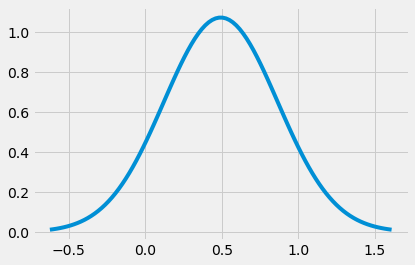

In [8]:
mu = mu_v.loc['AMZN']
variance = var_v.loc['AMZN']

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()